In [1]:
import pandas as pd
import numpy as np
from scipy import stats

******************************************************

TESTS:
* Dependent t Test            t = stats.ttest_rel(sample1,sample2), p_value = 2*(1-stats.t.cdf(t, df)
(One group, before-after)

* Independent Sample t Test   t = stats.ttest_ind(sample1, sample2), p_value = 2*(1 - stats.t.cdf(t, df))  
(Independent two group)

* One way ANOVA f Test        t = stats.f_oneway(sample1, sample2, ..), p_value = 1 - stats.f.cdf(t, df1, df2)
(for 2 or more group)

********************************************************************

EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $ 13.20 and standard deviation $ 2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

********************************************

1- ASSUMPTIONS:
- Small sample group (t test)


In [2]:
M = 13.20
sigma = 2.50
n = 40   #(Z test)
mu = 12.20
aplha = .01

2- HYPOTHESIS: 
* H0 : M = 13.20
* Ha : M < 13.20  (One-tail hypotesis) (Left tail)

3- TEST STATISTIC:

In [3]:
z = (mu - M) / (sigma / np.sqrt(n))
z

-2.5298221281347035

4- P_value:

In [4]:
p_value1 = stats.norm.cdf(z)
p_value1

0.005706018193000826

5- Conclusion:

In [62]:
alpha = 0.01

if p_value1 < alpha :
    print("'Reject the null.' At the 0.01 significance level, we have sufficient evidence to reject the H0 hypothesis. \nWith 1$ wage cut from each employee this compony tried to econmize its wage policy. \nTherefore, it is logical to conclude that this company pay for their employees less amount of money from set standard.")
else : 
    print("'Fail to reject the null.' At the 0.01 significance level, we don't have sufficient evidence to reject the H0 hypothesis. This company cannot be accused of paying substandard wages.")

'Reject the null.' At the 0.01 significance level, we have sufficient evidence to reject the H0 hypothesis. 
With 1$ wage cut from each employee this compony tried to econmize its wage policy. 
Therefore, it is logical to conclude that this company pay for their employees less amount of money from set standard.


In [6]:
# Comment: 
# With 1$ wage cut from each employee this compony tried to econmize its wage policy. 
# Therefore, it is logical to conclude that this company pay for their employees less amount of money from set standard.

******************************************************

EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

****************************************

In [8]:
df_soil = pd.read_excel("soil.xlsx")
df_soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


1- ASSUMPTIONS:
Independent 2 groups     (Independent t-Test)

In [6]:
alpha = 0.01

In [9]:
df_soil.Soil1.isnull().sum()

5

In [11]:
df_soil.Soil2.isnull().sum()

0

In [63]:
soil1_n = df_soil.Soil1[df_soil.Soil1.notnull()]
#soil1_n

In [13]:
n1 = len(soil1_n)
n1

30

In [14]:
n2 = len(df_soil.Soil2)
n2

35

2- HYPOTHESIS:
* H0 : M1 = M2
* H1 : M1 != M2    (Two tail test)

3- TEST STATISTIC:

In [15]:
ind_soil = stats.ttest_ind(soil1_n, df_soil.Soil2)
ind_soil

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [16]:
t = ind_soil.statistic
t

5.1681473319343345

4- P_value:

In [17]:
df = n1 + n2 - 2
df

63

In [18]:
p_value = 2 * (1 - stats.t.cdf(t, df))
p_value

2.59322873219503e-06

5- CONCLUSION: 
p_value < alpha


In [61]:
alpha = 0.01

if p_value < alpha :
    print("'Reject the null.' At the 0.01 significance level, we have sufficient evidence to reject the H0 hypothesis. \nAccording to the results we can claim that there is a significant difference between two soil sample in  terms of their shear strength(p <0.01)\nThe difference between two soil types might be derived from the amount of rainfall that each given location get throughout the year.")
else :
    print("'Fail to reject the null.' At the 0.01 significance level, we don't have sufficient evidence to reject the H0 hypothesis.")

'Reject the null.' At the 0.01 significance level, we have sufficient evidence to reject the H0 hypothesis. 
According to the results we can claim that there is a significant difference between two soil sample in  terms of their shear strength(p <0.01)
The difference between two soil types might be derived from the amount of rainfall that each given location get throughout the year.


In [ ]:
# Comment:
# According to the results we can claim that there is a significant difference between two soil sample in  terms of their shear strength(p <0.01)
# The difference between two soil types might be derived from the amount of rainfall that each given location get throughout the year.

****************************************

EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

    Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
    Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

*********************************************

In [20]:
df_pisa = pd.read_excel("2015 PISA Test.xlsx")
df_pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [49]:
df_pisa.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [50]:
df_pisa.groupby("Continent_Code").describe().T

Continent_Code                        AF          AS          EU          OC  \
internet_users_per_100 count    2.000000   17.000000   37.000000    2.000000   
                       mean    43.359918   68.455613   77.274888   86.391704   
                       std      7.297226   21.086060   12.425773    2.589686   
                       min     38.200000   21.976068   53.744979   84.560519   
                       25%     40.779959   50.300000   68.632900   85.476112   
                       50%     43.359918   74.000000   76.184000   86.391704   
                       75%     45.939877   84.948353   87.479056   87.307296   
                       max     48.519836   92.884826   98.200000   88.222889   
Math                   count    2.000000   17.000000   37.000000    2.000000   
                       mean   363.212100  466.216647  477.981449  494.559750   
                       std      5.099513   64.356490   35.150403    0.938401   
                       min    359.606200  380.259000  371.311400  493.896200   
                       25%    361.409150  403.833200  464.040100  494.227975   
                       50%    363.212100  459.816000  489.728700  494.559750   
                       75%    365.015050  531.296100  503.722000  494.891525   
                       max    366.818000  564.189700  521.250600  495.223300   
Reading                count    2.000000   17.000000   37.000000    2.000000   
                       mean   355.457400  454.059682  476.164608  506.085650   
                       std      7.916909   57.048962   37.720545    4.504341   
                       min    349.859300  346.549000  351.741500  502.900600   
                       25%    352.658350  408.102200  452.514300  504.493125   
                       50%    355.457400  433.542300  487.250100  506.085650   
                       75%    358.256450  508.690500  499.814600  507.678175   
                       max    361.055500  535.100200  526.424700  509.270700   
Science                count    2.000000   17.000000   37.000000    2.000000   
                       mean   381.074250  467.945847  478.299381  511.648700   
                       std      7.536556   56.671371   34.450616    2.340241   
                       min    375.745100  386.485400  383.682400  509.993900   
                       25%    378.409675  417.611200  460.774900  510.821300   
                       50%    381.074250  456.483600  490.225000  511.648700   
                       75%    383.738825  523.277400  501.936900  512.476100   
                       max    386.403400  555.574700  534.193700  513.303500   

Continent_Code                        SA  
internet_users_per_100 count    7.000000  
                       mean    60.180494  
                       std      9.772455  
                       min     40.900000  
                       25%     57.116462  
                       50%     64.289000  
                       75%     66.321532  
                       max     69.198471  
Math                   count    7.000000  
                       mean   402.887700  
                       std     18.128894  
                       min    377.069500  
                       25%    388.102200  
                       50%    409.033300  
                       75%    417.617650  
                       max    422.671400  
Reading                count    7.000000  
                       mean   425.359229  
                       std     19.709688  
                       min    397.541400  
                       25%    416.126900  
                       50%    425.303100  
                       75%    431.922700  
                       max    458.570900  
Science                count    7.000000  
                       mean   421.747186  
                       std     18.470319  
                       min    396.683600  
                       25%    408.205450  
                       50%    424.590500  
                       75%

1- ASSUMPTIONS: 
 Independent 2 groups (Independent t-Test)

In [23]:
df_pisa[df_pisa.Continent_Code == "EU"]["Math"].isnull().sum()

# dataset is clean

0

In [24]:
df_pisa[df_pisa.Continent_Code== "AS"]["Math"].isnull().sum()

# dataset is clean

0

In [137]:
n1 = len(df_pisa[df_pisa.Continent_Code == "EU" ])
n1

37

In [25]:
n2 = len(df_pisa[df_pisa.Continent_Code == "AS"])
n2

17

2- HYPOTHESIS:

* H0 : M1 = M2
* Ha : M1 != M2  (Two tail test)

3- TEST STATISTIC:

In [26]:
ind_pisa = stats.ttest_ind(df_pisa[df_pisa.Continent_Code == "EU"]["Math"], df_pisa[df_pisa.Continent_Code == "AS"]["Math"])
ind_pisa

Ttest_indResult(statistic=0.8700553179679787, pvalue=0.38826888111307556)

In [27]:
t_pisa = ind_pisa.statistic
t_pisa

0.8700553179679787

4- P_value:

In [28]:
df = n1 + n2 - 2
df

45

In [29]:
p_value = ind_pisa.pvalue
p_value

0.38826888111307556

In [30]:
p_value = 2  * (1 - stats.t.cdf(t_pisa, df))
p_value

0.3888877386354279

5- CONCLUSION:

In [60]:
alpha = 0.05   #Default
if p_value < alpha :
    print("'Reject the null.' At the 0.01 significance level, we have sufficient evidence to reject the H0 hypothesis.\n Depending on the independent sample t-test analysis; \nthere is no significant difference between European (EU) and Asian (AS) countries's math scores. \nTherefore, we cannot conclude that there is a country dependent factors effective on people's math scores with looking at 2015 PISA test results.")
else :
    print("'Fail to reject the null.' At the 0.01 significance level, we don't have sufficient evidence to reject the H0 hypothesis.")

'Reject the null.' At the 0.01 significance level, we have sufficient evidence to reject the H0 hypothesis.
 Depending on the independent sample t-test analysis; 
there is no significant difference between European (EU) and Asian (AS) countries's math scores. 
Therefore, we cannot conclude that there is a country dependent factors effective on people's math scores with looking at 2015 PISA test results.


In [32]:
# Comment:
# Depending on the independent sample t-test analysis there is no significant difference between European (EU) and Asian (AS) 
# countries's math scores. Therefore, we cannot conclude that there is a country dependent factors effective on people's math scores 
# with looking at 2015 PISA test results. 

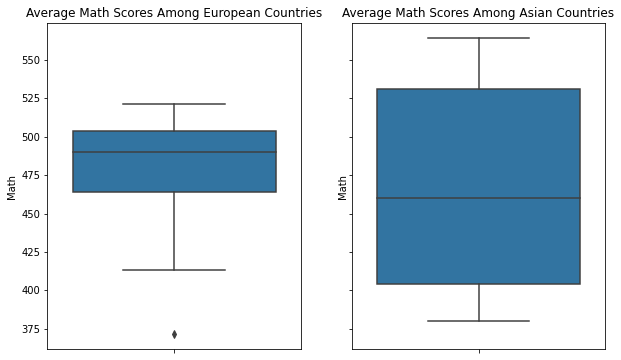

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6), sharey=True)
sns.boxplot(y=df_pisa[df_pisa.Continent_Code=='EU'].Math, ax=ax[0])
ax[0].set_title('Average Math Scores Among European Countries')
sns.boxplot(y=df_pisa[df_pisa.Continent_Code=='AS'].Math, ax=ax[1])
ax[1].set_title('Average Math Scores Among Asian Countries');

****************

EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

Sample Dataset 2014

CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128

*******************

In [33]:
df_sample = pd.read_excel("students_2014.xlsx")
df_sample.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,1995-03-22,NaT,NaT,NaN,NaN,0.0,0,72.35,NaN,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1995-01-01,NaT,NaT,NaN,Philosophy,0.0,0,70.66,179.20,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,1994-12-31,NaT,NaT,NaN,NaN,0.0,0,70.68,198.52,...,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,1994-12-01,NaT,NaT,NaN,business administration,1.0,0,NaN,198.34,...,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,1994-11-10,NaT,NaT,NaN,NaN,1.0,1,67.43,128.17,...,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


1- ASSUMPTIONS: 
Independent 2 groups (Independent t-Test)

In [34]:
df_new = pd.DataFrame(df_sample.loc[:, ["English", "Math"]])
df_new

,English,Math
0,88.24,60.02
1,89.45,70.19
2,96.73,71.20
3,74.06,55.89
4,82.61,65.52
...,...,...
430,87.72,65.31
431,91.01,70.25
432,81.05,58.16
433,75.59,66.84


In [35]:
df_dropEn = df_new.English.dropna()
df_dropEn

0      88.24
1      89.45
2      96.73
3      74.06
4      82.61
       ...  
430    87.72
431    91.01
432    81.05
433    75.59
434    75.65
Name: English, Length: 409, dtype: float64

In [36]:
df_dropMt = df_new.Math.dropna()
df_dropMt

0      60.02
1      70.19
2      71.20
3      55.89
4      65.52
       ...  
430    65.31
431    70.25
432    58.16
433    66.84
434    60.24
Name: Math, Length: 422, dtype: float64

In [38]:
df_sample.English.isnull().sum()

26

In [39]:
df_sample.Math.isnull().sum()

13

In [40]:
n1 = len(df_dropEn[df_dropEn.notnull()])
n1

409

In [41]:
n2 = len(df_dropMt[df_dropMt.notnull()])
n2

422

2- HYPOTHESIS:

* H0 : M1 = M2
* Ha : M1 != M2  (Two tail test)

3- TEST STATISTIC:

In [43]:
ind_sample = stats.ttest_ind(df_dropEn, df_dropMt)
ind_sample

Ttest_indResult(statistic=32.59188089176449, pvalue=1.2521075466222401e-150)

In [44]:
t = ind_sample.statistic
t

32.59188089176449

4- P_value:

In [45]:
ind_sample.pvalue

1.2521075466222401e-150

In [46]:
df = n1 + n2 - 2
df

829

In [47]:
p_value = 2 * (1 - stats.t.cdf(t, df))
p_value

0.0

5- CONCLUSION:

In [57]:
alpha = 0.05   #Default
if p_value < alpha :
    print("'Reject the null.' At the 0.01 significance level, we have sufficient evidence to reject the H0 hypothesis.\nAll in all, the paired sample t-test showed that there is a significant difference in the average of Math and English scores.")
else :
    print("'Fail to reject the null.' At the 0.01 significance level, we don't have sufficient evidence to reject the H0 hypothesis.")

'Reject the null.' At the 0.01 significance level, we have sufficient evidence to reject the H0 hypothesis.
All in all, the paired sample t-test showed that there is a significant difference in the average of Math and English scores.


In [ ]:
# Comment:
# According to paired sample t-test there is a significant difference in the average of Math and English scores. 